# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

---
### Datos que podrían ayudar a trabajar en el problema:

• Tipo de propiedad 

• Tamaño en m2 cubiertos

• Tamaño en m2 total

• Cocheras

• Piscina

• Amoblamiento

• Vistas

• Cantidad de ambientes

• Antigüedad 

• Provincia

• Localidad

• Distrito

• % Contaminación ambiental

• Cercanía a lugares turísticos

• Cercanía a zonas comerciales

##### Estas características le agregan valor a una propiedad y por ende influyen en el precio de las mismas, es por ello que las puedo considerar a la hora de estimar precios.



---
## 2. Análisis Exploratorio de Datos
---
##### En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí? ¿Qué tipo de gráfico será conveniente para presentar esta información? 
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información? ¿Cuáles serán los mejores predictores de la variable de interés? 

0. Importa las librerías necesarias para trabajar en la consigna.

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

In [ ]:
ds_prop = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
display(Markdown('##### El dataset de Properati tiene `' + str(ds_prop.shape[0]) + '` instancias y `' + str(ds_prop.shape[1]) + """` columnas.

##### Las primeras cinco instancias son las siguientes: """))
display(ds_prop.head(5))

In [ ]:
display(Markdown('##### Las columnas del dataset son las siguientes: '))
display(pd.DataFrame(ds_prop.columns, columns = ['Nombre de columna'], index = np.arange(1,20)))

##### Las variables que considero de interés para estudiar son:
- `l1`, `l2`, `l3`: que tratan acerca de la ubicación de la propiedad
- `rooms`, `bedrooms`, `bathrooms`, `surface_covered`, `surface_total`: que son características de la propiedad
- `price`, `currency`: tratan acerca del precio y cómo está valuada la propiedad
- `property_type`: tipo de propiedades que se encuentran disponibles
- `operation_type`: tipo de operación para cada propiedad

In [ ]:
display(Markdown('##### Los tipos de datos que tenemos en las columnas del dataset son los siguientes:'))
display(pd.DataFrame(ds_prop.dtypes, columns = ['Tipos de datos']))

Los tipos de datos que se encuentran en el dataset son: `float64` y `object`.

In [ ]:
display(Markdown('#### Gráficos de distribución de variables: '))
display(Markdown('##### Grafico sólo las variables que describí como variables de interés'))
aux = pd.DataFrame(ds_prop.iloc[:,5:]) # No me interesan las 5 primeras columnas

ds_prop_obj = pd.DataFrame(aux.select_dtypes(include = ['object']))
ds_prop_obj = pd.DataFrame(aux[['l1', 'l2', 'l3', 'currency', 'property_type', 'operation_type']])

ds_prop_float = pd.DataFrame(aux.select_dtypes(include = ['float64']))

k = 1
j = ds_prop_obj.shape[1]
plt.figure(figsize=(18, 6*j))
with sns.axes_style('whitegrid'):
    for i in range(0, j):
        plt.subplot(j, 1, k)
        plt.title('Countplot de: ' + ds_prop_obj.columns[i], fontdict = {'fontsize':18})
        sns.countplot(x = ds_prop_obj.columns[i], data = ds_prop_obj, order = ds_prop_obj[ds_prop_obj.columns[i]].value_counts().sort_values(ascending = False).index, palette = 'Spectral', edgecolor = 'k')
        plt.xlabel(ds_prop_obj.columns[i],fontdict = {'fontsize':14})
        plt.ylabel('N° de instancias', fontdict = {'fontsize':14})
        plt.xticks(rotation = 90)
        plt.tick_params(labelsize = 'large')
        k += 1
    plt.tight_layout()
    plt.show()

    k = 1
    j = ds_prop_float.shape[1]
    plt.figure(figsize=(18, 6*j))
    sns.set_palette('Set1')
    for i in range(0, j):
        plt.subplot(j, 1, k)
        plt.title('Histograma de: ' + ds_prop_float.columns[i], fontdict = {'fontsize':18})
        sns.distplot(ds_prop_float[ds_prop_float.columns[i]], hist_kws = {'edgecolor':'k'}, kde = False)
        plt.xlabel(ds_prop_float.columns[i], fontdict = {'fontsize':14})
        plt.ylabel('N° de instancias', fontdict = {'fontsize':14})
        plt.tick_params(labelsize = 'large')
        k += 1
    plt.tight_layout()
    plt.show()

In [ ]:
display(ds_prop_float.describe())

##### A partir de una rápida observación de los gráficos se puede ver que:
- El dataset tiene únicamente propiedades de Argentina, y dentro de Argentina solamente se está considerando Capital Federal y distintas zonas de G.B.A.
- La mayoría de las propiedades se encuentran en Capital Federal
- El barrio con mayor concentración de propiedades se encuentra dentro de Capital Federal y es Palermo
- Las propiedades están tasadas únicamente en dólares y el dataset contiene sólo información de ventas
- La mayoría de las propiedades corresponden a departamentos
- Las variables de precio, superficie cubierta y superficie total tienen valores extremos y gran variabilidad


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [ ]:
ds_faltantes = pd.DataFrame(ds_prop.isna().sum(), columns = ['Valores faltantes'])
ds_faltantes['Nombre de columna'] = ds_faltantes.index
ds_faltantes.index = np.arange(1,20)
ds_faltantes = ds_faltantes[['Nombre de columna', 'Valores faltantes']]
ds_faltantes['Porcentaje'] = round(ds_faltantes['Valores faltantes']/ [ds_prop.shape[0]] * 100,2)
display(ds_faltantes)

Dentro de las variables consideradas ` de interés`, las que poseen valores faltantes son: 
- `bathrooms`, ` surface_total`, ` surface_covered` 

Los valores faltantes de estas dos últimas variables representan un 14% de los datos disponibles en el DataSet.

In [ ]:
plt.figure(figsize=(15,10))
ds_faltantes2 = ds_prop.isnull()
sns.heatmap(ds_faltantes2,cmap ='viridis',)
plt.title('Mapa de calor de valores nulos')
plt.xlabel('Variables del DataSet')
plt.ylabel('Instancias del DataSet')
plt.show()

En el mapa de calor se pueden ver dónde están ubicadas las instancias con valores nulos (las de color amarillo).
-  Fijando la atención sólo en las variable de interés, se puede notar que la mayoría de los valores nulos para los tres features (`bathrooms, surface_covered y surface_total`) se encuentran en las mismas instancias, por lo que no estamos eliminando una gran cantidad de datos del DataSet al hacer la limpieza de las mismas.

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [ ]:
display(Markdown('##### Cantidad de diferentes tipos de propiedades: '+ str(ds_prop['property_type'].nunique())))
display(Markdown('Las mismas son: '))
array = ds_prop['property_type'].unique()
for i in range(0,10):
    display(Markdown('###### • '+ str(array[i])))
plt.figure(figsize=(18,6))
with sns.axes_style('whitegrid'):
    sns.countplot(x = 'property_type', data = ds_prop, order = ds_prop['property_type'].value_counts().sort_values(ascending = False).index, palette = 'Spectral', edgecolor = 'k')
    plt.xlabel('Tipos de propiedades', fontdict = {'fontsize':14})
    plt.ylabel('N° de instancias', fontdict = {'fontsize':14})
    plt.title('Cantidad de cada tipo de propiedad', fontdict = {'fontsize':18})
    plt.tick_params(labelsize = 'large', rotation = 45)
    plt.grid()
    plt.show()


In [ ]:
display(Markdown('- Como en el gráfico anterior no se pueden visualizar los datos de la mayoría de las columnas, entonces grafico en escala logarítmica.'))
fig, ax = plt.subplots(figsize=(18,6))
with sns.axes_style('whitegrid'):
    sns.countplot(x = 'property_type', data = ds_prop, order = ds_prop['property_type'].value_counts().sort_values(ascending = False).index, palette = 'Spectral', edgecolor = 'k')
    plt.xlabel('Tipos de propiedades', fontdict = {'fontsize':14})
    plt.ylabel('N° de instancias [log scale]', fontdict = {'fontsize':14})
    plt.title('Cantidad de cada tipo de propiedad', fontdict = {'fontsize':18})
    ax.set_yscale('log')
    plt.tick_params(labelsize = 'large', rotation = 45)
    plt.grid()
    plt.show()

Se puede observar claramente que los tipos de propiedades más frecuentes o con mayor cantidad de intancias son:
- Departamento
- Casa
- PH


In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
with sns.axes_style('whitegrid'):
    sns.countplot(x = 'property_type', hue = 'l2', data = ds_prop, order = ds_prop['property_type'].value_counts().sort_values(ascending = False).index, palette = 'Dark2', edgecolor = 'k')
    plt.xlabel('Tipos de propiedades', fontdict = {'fontsize':14})
    plt.ylabel('N° de instancias', fontdict = {'fontsize':14})
    plt.title('Cantidad de cada tipo de propiedad estratificada por región', fontdict = {'fontsize':18})
    plt.tick_params(labelsize = 'large', rotation = 45)
    plt.grid()
    plt.show()

In [ ]:
display(Markdown('- Como en el gráfico anterior no se pueden visualizar los datos de la mayoría de las columnas, entonces grafico en escala logarítmica.'))
fig, ax = plt.subplots(figsize=(18,6))
with sns.axes_style('whitegrid'):
    ax.set_yscale('log')
    sns.countplot(x = 'property_type', hue = 'l2', data = ds_prop, order = ds_prop['property_type'].value_counts().sort_values(ascending = False).index, palette = 'Dark2', edgecolor = 'k')
    plt.xlabel('Tipos de propiedades', fontdict = {'fontsize':14})
    plt.ylabel('N° de instancias [log scale]', fontdict = {'fontsize':14})
    plt.title('Cantidad de cada tipo de propiedad estratificada por región', fontdict = {'fontsize':18})
    plt.tick_params(labelsize = 'large', rotation = 45)
    plt.grid()
    plt.show()


In [ ]:
vc = pd.DataFrame(data = ds_prop['property_type'].value_counts())
vc = vc.rename(columns = {'property_type':'Instancias por tipo de propiedad'})
vc['% del total'] = round((vc['Instancias por tipo de propiedad']/vc['Instancias por tipo de propiedad'].sum())*100,2)
vc_1 = vc
display(Markdown('***Cantidad de instancias del dataset según tipo de propiedad:***'))
display(vc)

Se puede concluir que el tipo de `propiedad más frecuente` dentro del dataset es **departamento** y que la mayoría de las propiedades están concentradas en Capital Federal. 

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [ ]:
display(Markdown('#### Regiones de las publicaciones: '))
fig, ax = plt.subplots(figsize = (18,6))
#ax.set_yscale('log')
sns.countplot(y = 'l2', data = ds_prop, edgecolor = 'k', palette = 'PuRd', order = ds_prop['l2'].value_counts().sort_values(ascending = False).index, ax = ax)
plt.ylabel('Regiones', {'fontsize':14})
plt.xlabel('N° de instancias', {'fontsize': 14})
plt.title('N° de intancias por Regiones', {'fontsize':18})
plt.grid()


for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate(int(x[1]), (x.mean(), y), ha='left', va='bottom', fontsize = 14) #, rotation = 45, color = 'w')

fig, ax = plt.subplots(figsize = (18,12))
ax.set_xscale('log')
sns.countplot(y = 'l2', data = ds_prop, order = ds_prop['l2'].value_counts().sort_values(ascending = False).index, hue = 'property_type', edgecolor = 'k', palette = 'Paired')
plt.xlabel('Cantidad de propiedades [log scale]', {'fontsize':14})
plt.ylabel('Regiones', {'fontsize':14})
plt.title('Tipos de propiedades por región', {'fontsize':18})
plt.grid()

In [ ]:
array = np.unique(ds_prop['l2'].values)
for element in array:
    vc = pd.DataFrame(data = ds_prop[ds_prop['l2'] == element]['property_type'].value_counts())
    vc = vc.rename(columns = {'property_type':'Cantidad'})
    vc['% del total en '+element] = round((vc['Cantidad']/vc['Cantidad'].sum())*100,2)
    display(Markdown('#### Tipos de propiedad en: `' + element+'`'))
    display(vc)

A excepción de Capital Federal, en el resto de las regiones los tipos de propiedad en venta más frecuentes son:
- `Departamento`y `Casa`

En Capital Federal son:
- `Departamento` y `PH`

In [ ]:
display(Markdown('#### Barrios de las publicaciones: '))
fig, ax = plt.subplots(figsize = (21,6))
sns.countplot(x = 'l3', data = ds_prop, order = ds_prop['l3'].value_counts().sort_values(ascending = False).index, edgecolor = 'k', ax = ax)
plt.xlabel('Barrios', {'fontsize':14})
plt.ylabel('N° de instancias', {'fontsize': 14})
plt.title('N° de intancias por Barrios', {'fontsize':18})
plt.xticks(rotation = 90)
plt.grid()

barrios = pd.DataFrame(ds_prop['l3'].value_counts())
display((Markdown('##### Los 5 barrios con mayor cantidad de propiedades en venta son los siguientes:')))
display(barrios.head(5))

array = np.unique(ds_prop['l2'].values)
k = 1
j = round(array.shape[0]/2)
plt.figure(figsize = (21,9*j))
for element in array:
    plt.subplot(j, 2, k)
    k += 1
    sns.countplot(x = 'l3', data = ds_prop[ds_prop['l2'] == element], order = ds_prop[ds_prop['l2'] == element]['l3'].value_counts().sort_values(ascending = False).index, edgecolor = 'k')
    plt.xlabel('Barrios de la región '+ element, {'fontsize':14})
    plt.ylabel('N° de instancias', {'fontsize': 14})
    plt.title('N° de intancias por Barrios de la región ' + element, {'fontsize':18})
    plt.xticks(rotation = 90, fontsize = 14)
    plt.grid()
plt.tight_layout()



Palermo llega a acumular tres veces la cantidad de propiedades en venta de los barrios con más propiedades de GBA Zona Sur y GBA Zona Oeste.


5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [ ]:
display(Markdown('### • Las tres clases más abundantes son:'))
display(vc_1.head(3))
display(Markdown('### • La región con más propiedades publicadas es: ` Capital Federal` '))

In [ ]:
ds_prop = ds_prop.query(' l2 == "Capital Federal" & property_type in ["Departamento", "Casa", "PH"]')

In [ ]:
display(ds_prop.shape)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas. 

---
6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

#### 6.A

In [ ]:
display(ds_prop.drop(['lat','lon'], axis = 1).describe())

Las variables `'rooms'`, `'bedrooms'`, `'bathrooms'` tienen baja variabilidad.

Las variables `'surface_total'`, `'surface_covered'`, `'price'` tienen mucha variabilidad y parecieran tener valores extremos.

In [ ]:
display(Markdown('### Histogramas:'))
lista = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']
j = 1
plt.figure(figsize = (18,12))
for element in lista:
    plt.subplot(3,2,j)
    j += 1
    sns.distplot(ds_prop[element], kde = False, hist_kws = {'edgecolor':'k'}, color = 'r')
    plt.grid(b = 1)
    plt.title('Histograma de '+element)
    plt.ylabel('Nro de instancias')
plt.tight_layout()

En los histogramas de `surface_total, surface_covered, price` ya se puede notar que hay valores extremadamente altos, los cuales van a interferir con el análisis y predicción sino se filtran.

In [ ]:
display(Markdown('### Boxplots:'))
lista_1 = lista[:3]
lista_2 = lista[3:5]
lista_3 = lista[5:]
plt.figure(figsize=(18,8))
j = 1
with sns.axes_style('whitegrid'):
    for i in [lista_1, lista_2, lista_3]:
        plt.subplot(2,2,j)
        sns.boxplot(data = ds_prop[i], palette = 'RdPu')
        j += 1
     
    plt.tight_layout()


En los boxplot se puede observar:
- Las variables `rooms, bedrooms, bathrooms` tienen valores atípicos (considerandolos así a los que están por fuera de los whiskers). Se podría optar por filtrarlos.
- Las varibles `surface_total, surface_covered, price` tienen valores atípicos y son extremadamente altos. Se deberían filtrar para que no interfieran en el análisis y predicción.

In [ ]:
plt.figure(figsize=(18,8))
j = 1
with sns.axes_style('whitegrid'):
    display(Markdown('### Violinplots:'))
    for i in [lista_1, lista_2, lista_3]:
        plt.subplot(2,2,j)
        sns.violinplot(data = ds_prop[i], palette = 'RdPu')
        j += 1
     
    plt.tight_layout()

- ***Sin tener en cuenta las colas*** - La variable `rooms` pareciera tener una distribución normal, las variables `bedrooms` y `bathrooms` tienen un sesgo hacia los valores más pequeños.
- No se pueden analizar las otras variables ya que sus valores extremos no permiten apreciar las distribuciones.

In [ ]:
corr = ds_prop[lista].corr()
display(Markdown('#### Correlación entre variables:'))
display(corr)
plt.figure(figsize = (10,10))
sns.heatmap(corr, square = True, annot = True, alpha=0.75, cbar = True, cmap = 'RdPu')
plt.tick_params(rotation = 45)
plt.show()

##### ***A priori*** pareciera que las variables que más correlacionadas están con la variable ***`price`*** son: `rooms`, `bedrooms`, `bathrooms`.

##### ***Antes de realizar conclusiones***, debo filtrar las variables `surface_total`, `surface_covered`, `price`, y analizar su distribución y correlación.

#### 6.B

In [ ]:
ds_prop[lista_2].quantile(q=np.arange(0,1.01, 0.1))

Filtro como valor máximo los valores del cuantil en 0.9 para  `surface_total`

In [ ]:
ds_prop_filt = ds_prop.query('surface_total <= 180')
display(ds_prop_filt.shape)                             
plt.figure(figsize = (18,8))
plt.subplot(1,2,1)
sns.distplot(ds_prop_filt[lista_2[0]], label = lista_2[0])
sns.distplot(ds_prop_filt[lista_2[1]], label = lista_2[1])
plt.title('Histograma')
plt.grid()
plt.legend()
plt.subplot(1,2,2)
sns.boxplot(data = ds_prop_filt[lista_2]) 
plt.title('Boxplot')
plt.grid()
plt.show()

Se puede ver en el histograma y en el boxplot que los valores de `surface_covered` no han sido filtrados junto con `surface_total`. 

Lo que implica que no se cumple que  `surface_covered` **<=**`surface_total`.

In [ ]:
ds_prop_filt = ds_prop.query('surface_total <= 180 & surface_covered <= surface_total')
display(ds_prop_filt.shape)
plt.figure(figsize = (18,8))
plt.subplot(1,2,1)
sns.set_palette('Set2')
sns.distplot(ds_prop_filt[lista_2[0]], bins = 50,  label = lista_2[0], color = 'm')
sns.distplot(ds_prop_filt[lista_2[1]], bins = 50, label = lista_2[1], color = 'g')
plt.title('Histograma')
plt.xlabel('Metro cuadrados')
plt.ylabel('Frecuencia')
plt.grid()
plt.legend()
plt.subplot(1,2,2)
sns.boxplot(data = ds_prop_filt[lista_2]) 
plt.title('Boxplot')
plt.grid()

plt.show()

#### 6.C

In [ ]:
ds_prop_filt[lista_2].quantile(q = np.arange(0, 1.01, 0.1))

Filtro como mínimo de `surface_covered` = 35

In [ ]:
ds_prop_filt = ds_prop_filt.query('surface_covered>=35')
ds_prop_filt.shape

In [ ]:
display(Markdown('#### Variables `surface_total` y `surface_covered` filtradas.'))
plt.figure(figsize = (18,16))
plt.subplot(2,2,1)
sns.set_palette('Set2')
sns.distplot(ds_prop_filt[lista_2[0]], bins = 50,  label = lista_2[0], color = 'm')
sns.distplot(ds_prop_filt[lista_2[1]], bins = 50, label = lista_2[1], color = 'g')
plt.title('Histograma')
plt.xlabel('Metros cuadrados')
plt.ylabel('Frecuencia')
plt.grid()
plt.legend()
plt.subplot(2,2,2)
sns.boxplot(data = ds_prop_filt[lista_2]) 
plt.title('Boxplot')
plt.grid()
plt.subplot(2,2,3)
sns.violinplot(data = ds_prop_filt[lista_2]) 
plt.title('Violinplot')
plt.grid()

plt.tight_layout()
plt.show()

Puedo observar que los valores de `surface_total` y `surface_covered` se encuentran sesgados hacia la izquierda o los valores más pequeños de ambas variables. 
Para ambas variables el 50% de los valores pareciera acumularse entre 60 y 70 metros cuadrados.

In [ ]:
display(Markdown('Luego de filtrados los datos de las variables `surface_covered` y `surface_total` vuelvo a observar las correlaciones entre las variables'))
corr = ds_prop_filt[lista].corr()
display(Markdown('#### Correlación entre variables:'))
display(corr)
plt.figure(figsize = (10,10))
sns.heatmap(corr, square = True, annot = True, alpha=0.75, cbar = True, cmap = 'RdPu')
plt.tick_params(rotation = 45)
plt.show()

##### ***A diferencia de lo obtenido anteriormente***, las variables que más correlacionadas están con la variable ***`price`*** son: `surface_total` y `surface_covered`. 

##### ***Antes de llegar a conclusiones***, debería filtrar todavía la variable `price` y analizarla.

#### 6.D

El filtrado para que se cumpla la condición `surface_covered` **<=** `surface_total` ya se realizó en el apartado anterior

#### 6.E

In [ ]:
ds_prop_filt[lista_3].quantile(q=np.arange(0.75 ,1.0, 0.025))

Filtro como valor máximo el valor del cuantil en 0.9 para `price`

In [ ]:
ds_prop_filt = ds_prop_filt.query('price <= 375000')
display(ds_prop_filt.shape)                             
plt.figure(figsize = (18,8))
plt.subplot(1,2,1)
sns.distplot(ds_prop_filt[lista_3[0]], label = lista_3[0])
plt.title('Histograma')
plt.ylabel('Frecuencia')
plt.grid()
plt.legend()
plt.subplot(1,2,2)
sns.boxplot(data = ds_prop_filt[lista_3]) 
plt.title('Boxplot')
plt.grid()
plt.show()

Luego de realizar el filtrado superior de la variable `price` no se observan más valores atípicos. 

Igualmente, observo los valores mínimos.

In [ ]:
ds_prop_filt[lista_3].quantile(q=np.arange(0 , 0.275, 0.025))

Filtro como mínimo de `price` = 99000

In [ ]:
display(Markdown('#### Variable `price`filtrada.'))
ds_prop_filt = ds_prop_filt.query('price>=99000')
ds_prop_filt.shape
plt.figure(figsize = (18,16))
plt.subplot(2,2,1)
sns.set_palette('Set2')
sns.distplot(ds_prop_filt[lista_3[0]], bins = 50,  label = lista_3[0], color = 'm')
plt.title('Histograma')
plt.ylabel('Frecuencia')
plt.grid()
plt.legend()
plt.subplot(2,2,2)
sns.boxplot(data = ds_prop_filt[lista_3]) 
plt.title('Boxplot')
plt.grid()
plt.subplot(2,2,3)
sns.violinplot(data = ds_prop_filt[lista_3]) 
plt.title('Violinplot')
plt.grid()

plt.tight_layout()
plt.show()

La variable `price` también se encuentra sesgada hacia la izquiera o los valores pequeños que toma. 

El 50% de los valores parece estar acumulado entre 165000 y 185000 U$D.

In [ ]:
display(Markdown('Luego de filtrados los datos de la variable `price` vuelvo a observar las correlaciones entre las variables'))
corr = ds_prop_filt[lista].corr()
corr_eda = corr # lo uso en el desafio
display(Markdown('#### Correlación entre variables:'))
display(corr)
plt.figure(figsize = (10,10))
sns.heatmap(corr, square = True, annot = True, alpha=0.75, cbar = True, cmap = 'RdPu')
plt.tick_params(rotation = 45)
plt.show()

Ahora se nota aún más la correlación entre las variables `surface_total` y `surface_covered` con `price`.

También se nota cierta correlación entre las varibles `rooms`, `bathrooms`, `bedrooms` con `price`, similar a la que había en el primer análisis.

Otras variables altamente correlacionedas:
- `rooms` y `bedrooms`
- `surface_covered`y `surface_total`

Se nota cierta correlación entre:
- `rooms` y `surface_covered`
- `surface_covered`y `bedrooms`

#### 6.F

In [ ]:
lista.append('property_type') #Para estratificar el pairplot debo agregar a los features el de tipo de propiedad
ds_prop_filt = ds_prop_filt[lista]
ds_prop_filt.shape

In [ ]:
display(Markdown(' `Pairplot estratificado por tipo de propiedad` '))
plt.figure(figsize=(20,24))
with sns.axes_style('darkgrid'):
    sns.pairplot(data = ds_prop_filt, hue = 'property_type', palette = 'Set1')
    plt.show()
    

### Observaciones a partir del pairplot:

- Variable `rooms`:  hay diferencia poco significativa entre los tipos departamento, ph y casa, siendo la cantidad de habitaciones menor en los departamentos
- Variable `bedrooms`: hay diferencia poco significativa entre los tipos departamento, ph y casa, siendo la cantidad de dormitorios menor en los departamentos
- No se nota diferencia significativa en la variable `bathrooms` para los diferentes tipos de propiedades
- Varible `surface_covered`: para el tipo departamento los valores que toma esta variable se encuentran concetrados en los valores más pequeños o sesgados hacia la izquierda
- Variable `surface_total`: para el tipo departamento los valores que toma esta variable se encuentran concetrados en los valores más pequeños o sesgados hacia la izquierda, y los valores más altos se encuentran concentrados en las casas o sesgados hacia la derecha
- Variable `price`: toma similares valores para los departamentos y ph, concentrándose los valores más pequeños en estas clases

##### El análisis de las correlaciones fue realizado en el apartado anterior.

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.

---
A partir del análisis anterior se puede notar que hay diferencia entre algunas variables para cada tipo de propiedad y para cada barrio.

`Para el desafío:`

Voy a filtrar el dataset similar (redondeo algunos valores) a como lo filtré para el análisis:
- surface_covered >= 30
- surface_total <= 180
- surface_covered <= surface_total
- price <= 400000

## `| Desafío propuesto:`
##### Analizar si hay diferencia significativa entre los precios de las diferentes regiones y tipos de propiedades. De haber diferencia, analizar la zona más cara y tipo de propiedad más elevado. Luego, analizar y comparar las correlaciones entre variables con las obtenidas en el apartado anterior. Conclusiones.

Para ello voy a definir tres categorías de precios:
- `Bajos`: aquellos que se encuentren por debajo del 25% de los valores
- `Medios` o normales: aquellos valores que se encuentren dentro del RIQ
- `Altos` o elevados: aquellos que se encuentren por encima del 75% de los valores

`Carga y filtrado de DataSet`

In [ ]:
df = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
df = df[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price', 'property_type','l2','l3']]
ds_prop_filt = df.query('surface_total <= 180 & surface_covered<=surface_total & surface_covered>=30 & price <= 400000')
print(ds_prop_filt.shape)

`Determinación de categorías de precios`

In [ ]:
print(ds_prop_filt.price.describe()) 
idx_array = np.array(ds_prop_filt.index)
idx_array

##### **`Utilizo:`**
##### Precios/categorías:
- `Bajos`: menores a 100000
- `Medios` o normales: entre 100000 y 400000
- `Altos` o elevados: mayores a 400000

In [ ]:
precio_lista = []
for i in idx_array:
    value = int(ds_prop_filt.price[i])
    if value < 100000:
        precio_lista.append('bajo')
    elif value < 220000:
        precio_lista.append('medio')
    else:
        precio_lista.append('alto')
array_precio = np.array(precio_lista)
ds_prop_filt = ds_prop_filt.assign(precio = array_precio)

`DataSet con columna de categorías de precios`

In [ ]:
ds_prop_filt.head()

--------------

In [ ]:
display(Markdown('## `Gráfico`'))
display(Markdown('#### Evaluación de categorías por zonas:'))
fig, ax = plt.subplots(figsize=(18,6))
with sns.axes_style('whitegrid'):
    sns.countplot(x = 'precio', hue = 'l2', data = ds_prop_filt, order = ['alto', 'medio', 'bajo'], palette = 'Set1', edgecolor = 'k')
    plt.xlabel('Precios', fontdict = {'fontsize':14})
    plt.ylabel('N° de instancias', fontdict = {'fontsize':14})
    plt.title('Categorías de precios por zona', fontdict = {'fontsize':16})
    plt.tick_params(labelsize = 'large', rotation = 45)
    plt.grid()
    plt.show()

A partir de este gráfico puedo hacer las siguientes conclusiones:
- En GBA Zona Norte y Capital Federal las categorías de precios se pueden rankear: `medios`, `altos` y `bajos`
- En GBA Zona Oeste y GBA Zonas Sur las categorías de precios se pueden rankear: `bajos`, `medios`, y `altos`

##### **De todos modos**, para poder comparar entre regiones y determinar cuál es la más cara, debo utilizar como comparador los porcentajes de las categorías dentro de cada región.

In [ ]:
display(Markdown('#### Evaluación de categorías de precios por zonas:'))
array_vc = np.unique(ds_prop_filt['l2'].values)
k = 1
plt.figure(figsize = (18,10))
for element in array_vc:
    vc_l2 = pd.DataFrame(data = ds_prop_filt[ds_prop_filt['l2'] == element]['precio'].value_counts())
    vc_l2 = vc_l2.rename(columns = {'precio':'Cantidad'})
    vc_l2['porcentaje'] = round((vc_l2['Cantidad']/vc_l2['Cantidad'].sum())*100,2)
    display(Markdown('Precios en: **'+element+'**'))
    display(pd.DataFrame(vc_l2.porcentaje))
    plt.subplot(2,2,k)
    k += 1
    sns.barplot(x = vc_l2.index, y = 'porcentaje', data = vc_l2, order = ['alto', 'medio', 'bajo'], palette = 'viridis', edgecolor = 'k')
    plt.ylabel('Porcentaje [%]')
    plt.xlabel('Categoría de precios')
    plt.title('Zona: '+element)
    plt.grid()
plt.show()
    

Las dos zonas más caras son entonces: `GBA Zona Norte `y `Capital Federal`.

Si se tienen en cuenta categorías de precios medios y altos, `Capital Federal` sería la región menos económica.

Se debe tener en cuenta que solamente se consideran las categorías de precios según rangos determinados por los cuantiles. Ahora evalúo dentro de esas dos zonas más caras la variable `price`.

In [ ]:
ds_prop_alto = ds_prop_filt.query('l2 in ["Capital Federal", "Bs.As. G.B.A. Zona Norte"]') 
ds_prop_alto.shape

In [ ]:
display(Markdown('### Distribución de la variable `price`:'))
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.distplot(ds_prop_alto[ds_prop_alto.l2 == 'Capital Federal']['price'], label = 'Capital Federal')
sns.distplot(ds_prop_alto[ds_prop_alto.l2 == 'Bs.As. G.B.A. Zona Norte']['price'], label = 'GBA Zona Norte')
plt.grid()
plt.ylabel('Frecuencia', fontdict = {'fontsize':14})
plt.xlabel('Precios en dólares', fontdict = {'fontsize':14})
plt.title('Histograma', fontdict = {'fontsize':16})
plt.legend()
plt.subplot(2,2,2)
sns.violinplot(x = 'l2', y = 'price', data = ds_prop_alto, palette = 'PuRd')
plt.title('Violinplot', fontdict = {'fontsize':16})
plt.xlabel('Zona', fontdict = {'fontsize':14})
plt.ylabel('Precio', fontdict = {'fontsize':14})
plt.subplot(2,2,3)
sns.boxplot(x = 'l2', y = 'price', data = ds_prop_alto, palette = 'RdPu')
plt.title('Boxplot', fontdict = {'fontsize':16})
plt.xlabel('Zona', fontdict = {'fontsize':14})
plt.ylabel('Precio', fontdict = {'fontsize':14})


plt.tight_layout()
plt.show()

##### Se puede concluir que la variable precio no muestra una diferencia significativa en su distribución para las dos regiones más caras.

`Analizo si hay diferencia de precios y dimensiones de las superficies en los tipos de propiedades para las regiones más caras`

**_Utilizo las tres clases más abundantes: `Departamento`, `PH` y `Casa`._**

In [ ]:
ds_prop_alto = ds_prop_alto.query("property_type in ['Departamento', 'PH', 'Casa']")
ds_prop_alto.shape

In [ ]:
display(Markdown('##### Pairplot de variables: `price, surface_total, surface_covered`'))
sns.pairplot(ds_prop_alto[['price','surface_total','surface_covered', 'property_type']], hue = 'property_type')

In [ ]:
display(Markdown('##### Boxplots variables: `price, surface_total, surface_covered`'))
col = ['price', 'surface_total', 'surface_covered']
k = 1
plt.figure(figsize = (18,10))
for i in col:
    plt.subplot(2,2,k)
    sns.boxplot(x = 'property_type', y = i, data = ds_prop_alto, palette = 'viridis')
    plt.title('Boxplot', fontdict = {'fontsize': 16})
    plt.xlabel('Tipo de propiedad', fontdict = {'fontsize': 14})
    k += 1
plt.tight_layout()
plt.show()

##### - Conclusiones:
- Variable `price`: la distribución no presenta diferencia significativa para los distintos tipos de propiedades
- Variable `surface_total`: hay diferencia significativa para los distintos tipos de propiedades. El 75% de los valores de **Departamento** son menores a por lo menos el 75% de los valores de **Casa**, ya que se observa que el RIQ  de Departamentos está por debajo del cuantil 25% de Casa. La mediana de **Casa** se encuentra incluso por encima del RIQ de **PH**. Estas diferencias tienen su explicación en que los departamentos y PH's no suelen tener superficies no cubiertas o espacios al 'aire libre', como si sucede en la mayoría de las casas
- Variable `surface_covered`: igual que para `surface_total` hay diferencia significativa para los tres tipos de propiedades


##### **Por último**, voy a filtrar el DataSet de las zonas más caras sólo para Capital Federal y los tipos de propiedades más abundantes: `Departamento`. 
##### De esta forma el nuevo DataSet `'ds_prop_alto_dpto'` es comparable con el DataSet obtenido en EDA, con la diferencia que este DS. considera los tres tipos de propiedades más abundantes.

In [ ]:
ds_prop_alto_dpto = ds_prop_alto.query(" property_type == 'Departamento'")
ds_prop_alto_dpto.shape

In [ ]:
corr_desafio = ds_prop_alto_dpto.corr()

In [ ]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.heatmap(corr_desafio, cmap = 'viridis', annot = True, annot_kws = {'fontsize': 13}, square = True)
plt.title('Mapa de calor: correlaciones desafío', fontdict = {'fontsize':18})
plt.tick_params(size = 16, rotation = 45)
plt.subplot(1,2,2)
sns.heatmap(corr_eda, cmap = 'viridis', annot = True, annot_kws = {'fontsize': 13} , square = True) #Correlación EDA
plt.title('Mapa de calor: correlaciones EDA', fontdict = {'fontsize':18})
plt.tick_params(size = 16, rotation = 45)
plt.tight_layout()
plt.show()

---
#### Conclusiones finales: 

- Del DataSet original las regiones más caras son Capital Federal y G.B.A. Zona Norte, con gran diferencia con las otras dos zonas. 
- Dentro de estas regiones se puede ver que hay diferencia en las variables de superficie cubierta y total para cada tipo de propiedad, por lo que sería necesario separarlas para poder estudiarlas. 
- No hay diferencia para los tipos de propiedades y la variable precio.
- Separando los tipos de propiedades y evaluando las correlaciones para un DataSet con tipo de propiedad `Departamento` (dentro de Capital Federal) y comparándolas con las correlaciones obtenidas luego del análisis EDA (mismos filtros de variables price, surface_covered, surface_total, l2, excepto que contiene los 3 tipos de propiedades más abundantes) puedo ver que:
    - aumenta en casi 12% la correlación entre variables `rooms`, `bedrooms`, `bathrooms` con `price`
    - aumenta en casi 15% la correlación entre las variables `surface_total`, `surface_covered` con `price`
    - el resto de las correlaciones permanecen similares o no se justifica comentar los cambios 
---
 ###  `|` Respuesta
##### ***Sí hay diferentes tendencias en los precios de las zonas del Dataset*** , y dentro de las zonas más caras, ***se encuentran diferencias significativas entre algunas variables para los distintos tipos de propiedades más abundantes***, por lo que se sugiere separarlas para evaluarlas - al menos al tipo Departamento. Al considerar sólo este tipo de propiedad, ***se notan cambios en la medida de hasta un 15%*** en la correlación de las variables con la variable `price`, la cual nos interesará luego predecir. 

## 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento` en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

---
#### Métrica para evaluar los resultados: R2 Score. 

Elegí ***r2_score*** porque es una medida estadística de qué tan bien las predicciones de regresión se aproximan a los puntos de datos reales
- El mejor puntaje posible es 1.0 - indica que las predicciones se ajustan perfectamente a los datos -, y puede ser negativo (porque el modelo puede ser arbitrariamente peor). 
- Un modelo constante que siempre predice el valor esperado de y, sin tener en cuenta las características de entrada, obtendría una puntuación R² de 0.0 - `caso que se verá en el modelo de Benchmark `.

##### R2 se puede definir como una versión normalizada o reescalada del MSE. 
  - Si MSE = 0, entonces R2 = 1.0: las predicciones son perfectas
  - Si MSE es tan malo como simplemente adivinar la media de todo, entonces R2 = 0.0, tan malo como sea posible
  
##### Es más intuitivo utilizar r2_score que MSE, y el fin es el mismo, reducir el error cuadrático medio y asegurar que las predicciones sean buenas. Por eso decidí utilizar r2_score. 

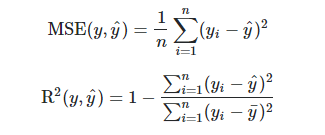


###### ***Nota***: voy a medir también RMSE, MAE y Max Error como medidas auxiliares para evaluar los distintos modelos, cuando r2_score sea similar. 

---

#### Definición de variables

##### Variable a predecir (y): `price`

##### Variables predictoras (X): `rooms`, `bathrooms`, `surface_covered`

- No utilizo:  `bedrooms` ya que está altamente correlacionada con `rooms`, está considerada dentro de `rooms` (es un tipo de habitación), y porque esta última tiene más sentido usarla.
- No utilizo: `surface_total` para la predicción de Departamentos, ya que, como se concluyó en el desafío, hay mucha diferencia para los tipos Casa, PH y departamento, y por otro lado está altamente correlacionada con `surface_covered`, que si me interesa utilizar y tiene más sentido. 
---
#### Benchmark

- Como modelo para Benchmark elegí uno que para cualquier valor a predecir dé como resultado el valor esperado o valor medio de la variable de salida. Es un modelo muy simple y muy malo para predecir. 

###### El modelo será evaluado a continuación. 
---

In [ ]:
# Carga de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Carga de datos
ds_prop = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv') 
ds_prop = ds_prop.query(" l2 =='Capital Federal' & property_type in ['Departamento', 'PH', 'Casa']")
ds_prop = ds_prop[['rooms', 'bedrooms','bathrooms', 'surface_total', 'surface_covered', 'price']] 
ds_prop = ds_prop.query("surface_total>=15 & surface_total<=1000 & price<=4000000") 
ds_prop.dropna(inplace=True)
ds_prop.shape

---
### Clase RegressionModels:

- Se debe ingresar DataSet, variable a predecir y variables predictoras (si éstas últimas no se ingresan, la clase utiliza todas las features restantes de tipo float64 o int64 del DataSet).

##### Cuando se inicia la clase las variables `X` e `y` se dividen en dos conjuntos de train y test, que quedarán disponibles para las predicciones y evaluaciones. 

#### Dentro de la clase están definidas las siguientes funciones: 

##### •`RegressionModels_tree`, `RegressionModels_knn`, `RegressionModels_linear`: entrenan modelos y hacen predicciones de árboles de decisión, vecinos cercanos y regresión lineal respectivamente
##### •`RegressionModels_plot_metrics` : devuelve las métricas de ***rs_score, mean absolute error, root mean squared error y max error*** en tablas y gráficos
##### •`RegressionModels_plot_errors`: grafica las diferencias entre las predicciones y los valores reales en histogramas y boxplots
##### •`RegressionModels_plot_predictions`: grafica en histogramas las variables de Train y Test predecidas, y un scatter de las variable Test predecida vs real
##### •Otras funciones: `Benchmark`, `plot_traintest`
##### •`run_all`: corre todas las funciones 

In [ ]:
class RegressionModels:
    def __init__(self, dataset, y_column_name, x_columns = 0):
        """
       
        La clase eliminará toda columna del dataset que no sea tipo float64 o int64
        
        Variable de respuesta: y_column_name (string). Ingresar como: 'y_column_name'
        
        Variables independientes: 'x_columns', si no se modifica, toma todas las columnas del dataset 
        
        En caso de ingresar 'x_columns' debe tener la siguiente sintaxis: ['column_name_1', 'column_name_2', ...]
        
        """
        
        
        # Definición de variables
        self.dataset = dataset.select_dtypes(include = ['float64','int64']) # Dejo únicamente las columnas con las que puedo trabajar
        self.y_ds = self.dataset.loc[:, y_column_name]
                

        if x_columns != 0:
            self.x_ds = self.dataset.loc[:,x_columns]
        else:
            self.x_ds = self.dataset.loc[:,:]
            self.x_ds.drop(y_column_name, axis = 1, inplace = True)
             
        self.y_pred = {}
        self.y_pred_train = {}
        self.tree_range = []
        self.knn_n = []
        self.tree_model = False
        self.knn_model = False
        self.linear_model = False
        self.y_column_name = y_column_name
        self.x_columns = x_columns
        
        # Definición de variables de Train y Test
        self.y_ds = pd.Series(self.y_ds)
        from sklearn.model_selection import train_test_split
        X = np.array(self.x_ds)
        y = np.array(self.y_ds)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
   
        from IPython.display import display, Markdown
        display(Markdown("""---
# **RegressionModels** `Class`"""))
        display(Markdown("""
##### Ha ingresado un dataset con """+str(self.x_ds.shape[0])+""" instancias y """+str(dataset.shape[1])+""" columnas.
##### La variable a predecir, y, es la siguiente: ***"""+self.y_column_name+"""***
##### Las variables predictoras, X, son las siguientes: ***""" +str(self.x_ds.columns.values)+"""***
###### Se ha separado el dataset en uno de train (70%) y otro de test (30%). Las predicciones se harán sobre estos datasets. """))
        display(Markdown("""---
#### Las funciones disponibles son las siguientes:"""))
        display(Markdown("""
##### •`run_all`: corre todas las funciones 
##### •`RegressionModels_tree`, `RegressionModels_knn`, `RegressionModels_linear`: entrenan modelos y hacen predicciones
##### •`RegressionModels_plot_metrics` : devuelve las métricas de errores en tablas y gráficos
##### •`RegressionModels_plot_errors`: grafica las diferencias entre las predicciones y los valores reales
##### •`RegressionModels_plot_predictions`: grafica en histogramas las variables de Train y Test predecidas
##### •Otras funciones: `Benchmark`, `plot_traintest`
"""))
        self.plot_traintest()
        
            # Fin __init__  
    def plot_traintest(self):
        from IPython.display import display, Markdown
        display(Markdown("""---
##### Se ha separado el dataset en uno de Train (70%) y otro de Test (30%)

#### Gráficos distribución Y, Y Train, Y Test
"""))
        with sns.axes_style('whitegrid'):
            ytt_list = [self.y_ds, self.y_train, self.y_test]
            ytt_names = [' ', 'Train', 'Test']
            i = 1
            plt.figure(figsize=(18,9))
            for p in range(0,3):
                plt.subplot(3,2,i)
                sns.distplot(ytt_list[p], bins = 30, kde = False, hist_kws = {'edgecolor': 'k'})
                plt.title('Histograma Variable Y '+ytt_names[p], fontdict = {'fontsize':16})
                plt.xlabel('Variable Y '+ytt_names[p], {'fontsize': 14})
                plt.xlim(0)
                plt.xticks(rotation = 45)
                i += 1
                plt.subplot(3,2,i)
                sns.violinplot(ytt_list[p])
                plt.title('Violinplot Variable Y '+ytt_names[p], fontdict = {'fontsize':16})
                plt.xlabel('Variable Y '+ytt_names[p], {'fontsize': 14})
                plt.xlim(0)
                plt.xticks(rotation = 45)
                i += 1
          
        plt.tight_layout()
        plt.show()
 

    def Benchmark(self):
        from sklearn.metrics import mean_squared_error, r2_score
        from IPython.display import display, Markdown
        display(Markdown("""---
## `Benchmark`:
#### El modelo predice siempre el valor medio"""))
        self.y_pred = {} #En caso que ya tenga valores cargados de antes.. 
        self.y_pred_train = {}
        
        prediction = self.y_train.sum()/self.y_train.shape[0]
        
        self.y_pred['benchmark_Test'] = np.ones(self.X_test.shape[0])*prediction
        self.y_pred_train['benchmark_Train'] = np.ones(self.X_train.shape[0])*prediction
        
        self.y_pred = pd.DataFrame(self.y_pred)
        self.y_pred_train = pd.DataFrame(self.y_pred_train)
        
        self.y_pred = np.array(self.y_pred)
        self.y_pred_train = np.array(self.y_pred_train)
        

        plt.figure(figsize=(18,5))
        sns.scatterplot(self.y_test, self.y_pred[:,0])
        plt.title('Valores reales vs valores predecidos')
        plt.xlabel('Y Test')
        plt.ylabel('Y Pred')
        plt.xticks(rotation = 45)
        plt.yticks(rotation = 45)
        r2_score_ = []
        rmse_ = []
        r2_score_train = []
        rmse_train = []
        
        rmse_.append((np.sqrt(mean_squared_error(y_true = self.y_test, y_pred = self.y_pred[:,0]))))
        r2_score_.append((r2_score(y_true = self.y_test, y_pred = self.y_pred[:,0])))
        
        rmse_train.append((np.sqrt(mean_squared_error(y_true = self.y_train, y_pred = self.y_pred_train[:,0]))))
        r2_score_train.append((r2_score(y_true = self.y_train, y_pred = self.y_pred_train[:,0])))
        
        self.y_pred = pd.DataFrame(self.y_pred)
        self.y_pred_train = pd.DataFrame(self.y_pred_train)
        
        metrics_test = {'R2 Score Y Test':r2_score_, 'RMSE Y Test':rmse_}
        metrics_train = {'R2 Score Y Train':r2_score_train, 'RMSE Y Train':rmse_train}
        metrics = pd.DataFrame(metrics_test)
        metrics2 = pd.DataFrame(metrics_train)                          
                
  #Plot del dataframe de las métricas
        for i in range(0,2):
            if i == 0:
                k = metrics
            else:
                k = metrics2
            fig, ax = plt.subplots()
            fig.patch.set_visible(False)
            the_table = ax.table(cellText=k.values, colLabels=k.columns, loc='center')
            the_table.auto_set_font_size(False)
            the_table.set_fontsize(20)
            the_table.scale(5,3)

            ax.axis('off')
            ax.axis('tight')
            plt.show()     
        
    
    def RegressionModels_tree(self, min_depth = 1, max_depth = 5, random_state = 42):
        """
        Ejecuta árboles de decisión para modelos de regresión.
        
        Devuelve dos DataFrames:
            - DataFrame de la predicción sobre X_test
            - DataFrame de la predicción sobre X_train
        """
        self.y_pred = {} #En caso que ya tenga valores cargados de antes.. 
        self.y_pred_train = {}
        if min_depth > max_depth:
            max_depth = min_depth
        self.tree_range = np.arange(min_depth, max_depth + 1, dtype=int)
        self.knn_n = [] # Vacío la lista para que no interfiera en la función RegressionModels_plot_error(), sino tengo que agregarle a la función un atributo extra y una instancia de verficación
        self.tree_model = True
        self.knn_model = False
        self.linear_model = False
        from sklearn.tree import DecisionTreeRegressor
        
        for depth in range(min_depth, max_depth+1):
            tree_regressor = DecisionTreeRegressor(max_depth = depth, random_state = random_state)
            tree_regressor.fit(self.X_train, self.y_train)
            depth = 'y_pred_depth_'+str(depth)
            self.y_pred[depth] = tree_regressor.predict(self.X_test)
            self.y_pred_train[depth] = tree_regressor.predict(self.X_train)
       
        self.y_pred = pd.DataFrame(self.y_pred)
        self.y_pred_train = pd.DataFrame(self.y_pred_train)
        
        return self.y_pred
    
    
    def RegressionModels_knn(self, n_knn_min = 3, n_knn_max = 5, nro_modelos = 3):
        """
        Ejecuta KNN para modelos de regresión.
        
        Devuelve dos DataFrames:
            - DataFrame de la predicción sobre X_test
            - DataFrame de la predicción sobre X_train
            
        """
        self.y_pred = {} #En caso que ya tenga valores cargados de antes.. 
        self.y_pred_train = {}
        if n_knn_min >= n_knn_max:
            n_knn_max = n_knn_min
            nro_modelos = 1
        if n_knn_max > self.X_train.shape[0]: #Chequeo que el valor de vecinos elegido no supere la cantidad de datos disponibles para el entrenamiento
            n_knn_max = self.X_train.shape[0]
            
        step = np.linspace(start= n_knn_min, stop=n_knn_max, num=nro_modelos, dtype=int) # Número de vecinos que va a tomar
        step = np.unique(step) # Me aseguro que no hayan quedado valores repetidos
        self.knn_n = step
        self.tree_range = [] # Vacío la lista para que no interfiera en la función RegressionModels_plot_error(), sino tengo que agregarle a la función un atributo extra y una instancia de verficación
        self.tree_model = False
        self.knn_model = True
        self.linear_model = False
        from sklearn.neighbors import KNeighborsRegressor
        
        for k in range(0, step.size):
            knn_regressor = KNeighborsRegressor(n_neighbors = step[k])
            knn_regressor.fit(self.X_train, self.y_train)
            step_str = str('KNeighbors_'+str(step[k]))
            self.y_pred[step_str] = knn_regressor.predict(self.X_test)
            self.y_pred_train[step_str] = knn_regressor.predict(self.X_train)
         
        self.y_pred = pd.DataFrame(self.y_pred)
        self.y_pred_train = pd.DataFrame(self.y_pred_train)
        
        return self.y_pred
    
    
    def RegressionModels_linear(self):
        """
        Ejecuta el modelo de regresión lineal.
        
        Devuelve dos DataFrames:
            - DataFrame de la predicción sobre X_test
            - DataFrame de la predicción sobre X_train
        """
        self.y_pred = {} #En caso que ya tenga valores cargados de antes.. 
        self.y_pred_train = {}
        self.tree_range = [] 
        self.knn_n = []
        self.tree_model = False
        self.knn_model = False
        self.linear_model = True
        from sklearn.linear_model import LinearRegression
        
        linear_reg = LinearRegression()
        linear_reg.fit(self.X_train, self.y_train)
        self.y_pred['linear_regression'] = linear_reg.predict(self.X_test)
        self.y_pred_train['linear_regression'] = linear_reg.predict(self.X_train)
        
        self.y_pred = pd.DataFrame(self.y_pred)
        self.y_pred_train = pd.DataFrame(self.y_pred_train)
        
        return self.y_pred

    def RegressionModels_plot_metrics(self): 
        """
        La función calcula y grafica las métricas de R2 score, max error, mean absolute error y root mean squared error.
                
        """
        from IPython.display import display, Markdown
        from sklearn.metrics import r2_score, max_error, mean_absolute_error, mean_squared_error
        r2_score_ = []
        mae_ = []
        rmse_ = []
        max_error_ = []
        r2_score_train = []
        mae_train = []
        rmse_train = []
        max_error_train = []
        Y_pred = np.array(self.y_pred) 
        Y_pred_train = np.array(self.y_pred_train)
        model_type = []
        
        if self.tree_model == True:
            x_range = self.tree_range
            x_label = 'Profundidad del árbol'
            modelo = 'Árboles de Decisión'
            for t in range(0,Y_pred.shape[1]):
                model_type.append('Depth: '+str(self.tree_range[t]))
                
        elif self.knn_model == True:
            x_range = self.knn_n
            x_label = 'Número de vecinos'
            modelo = 'K Vecinos Cercanos'
            for t in range(0,Y_pred.shape[1]):
                model_type.append('KN: '+str(self.knn_n[t]))
        elif self.linear_model == True:
            x_range = np.arange(0,Y_pred.shape[1])  
            x_label = ' '
            modelo = 'Regresión Linear'
            model_type.append('Regresión Linear')

        for i in range(0, Y_pred.shape[1]):
            r2_score_.append(round(r2_score(y_true = self.y_test, y_pred = Y_pred[:,i]),2))
            mae_.append(int(mean_absolute_error(y_true = self.y_test, y_pred = Y_pred[:,i])))
            max_error_.append(int(max_error(y_true = self.y_test, y_pred = Y_pred[:,i])))
            rmse_.append(int(np.sqrt(mean_squared_error(y_true = self.y_test, y_pred = Y_pred[:,i]))))
        for i in range(0, Y_pred_train.shape[1]):
            r2_score_train.append(round(r2_score(y_true = self.y_train, y_pred = Y_pred_train[:,i]),2))
            mae_train.append(int(mean_absolute_error(y_true = self.y_train, y_pred = Y_pred_train[:,i])))
            max_error_train.append(int(max_error(y_true = self.y_train, y_pred = Y_pred_train[:,i])))
            rmse_train.append(int(np.sqrt(mean_squared_error(y_true = self.y_train, y_pred = Y_pred_train[:,i]))))
            
        metrics_test = {'Modelo': model_type,'R2 Score Y Test':r2_score_, 'MAE Y Test':mae_, 'Max Error Y Test': max_error_, 'RMSE Y Test':rmse_}
        metrics_train = {'Modelo': model_type, 'R2 Score Y Train':r2_score_train, 'MAE Y Train':mae_train, 'Max Error Y Train': max_error_train, 'RMSE Y Train':rmse_train}
        metrics = pd.DataFrame(metrics_test)
        metrics2 = pd.DataFrame(metrics_train)                          
          

        display(Markdown("""---
# Tabla y gráficos de las métricas de error:
#### Modelo utilizado: """+"***"+modelo+"""***

##### Métricas utilizadas: R2_score, Mean Absolute Error, Root Mean Squared Error, Max Error.

##### Tabla de métricas:"""))
             
        #Plot tabla métricas
        for i in range(0,2):
            if i == 0:
                k = metrics
            else:
                k = metrics2
            fig, ax = plt.subplots()
            fig.patch.set_visible(False)
            the_table = ax.table(cellText=k.values, colLabels=k.columns, loc='center')
            the_table.auto_set_font_size(True)
            the_table.scale(3,2)

            ax.axis('off')
            ax.axis('tight')
            fig.tight_layout()
            plt.show()

         #Plot gráficas de las métricas  
        plt.figure(figsize=(18,16))
        with sns.axes_style('whitegrid'):
            metrics_names =['R2 Score', 'RMSE',  'MAE', 'Max Error']
            metrics_an = [r2_score_, r2_score_train, rmse_, rmse_train, mae_, mae_train, max_error_, max_error_train]
            q = 0
            for i in range(1,5):
                p = i - 1
                plt.subplot(4,1,i)
                plt.title(metrics_names[p] +' Metric', {'fontsize':20})
                plt.plot(x_range, np.array(metrics_an[q]), "*-", label = 'Test')
                q += 1
                plt.plot(x_range, np.array(metrics_an[q]), 'o-', label = 'Train')
                q += 1
                plt.legend()
                plt.xlabel(x_label, {'fontsize':14})
                plt.ylabel(metrics_names[p], {'fontsize':14})
    

            plt.subplots_adjust(hspace = 2.5)
            plt.tight_layout() 
            plt.show() 
   
   
                  
    def RegressionModels_plot_error(self, depth_or_knn = 0):
        """    
        La función grafica el histograma de errores de las predicciones sobre X Train y X Test.
        
        También grafica un scatter para Y Test vs. Y pred.
        
                
        Si se quiere graficar sólo una profundidad de árbol o n° de vecinos se debe indicar:
            
            - profundidad o n° de vecinos en el atributo 'depth_or_knn'
        
        """
        import matplotlib.pyplot as plt
        import seaborn as sns
        import scipy.stats as stats
        from IPython.display import display, Markdown
        sns.set()
        
        def plotear(self):
                plt.figure(figsize=(18,8))
                plt.suptitle('Error Plots', fontsize = 26, ha = 'center', va = 'top')
                with sns.axes_style('whitegrid'):    

                    plt.subplot(1,1,1)
                    sns.distplot(y_pred_array - self.y_test, bins = 20, label = 'Test')
                    sns.distplot(y_pred_train_array - self.y_train, bins = 20, label = 'Train')
                    plt.legend()
                    plt.xlabel('Error', {'fontsize':14})

            
                    plt.subplots_adjust(wspace = 1.5, hspace = 2.5)
                    plt.show() 
        
        # Si cargo valores entonces entra en esta IF CLAUSE:
        if depth_or_knn != 0: 
            if depth_or_knn in self.tree_range or depth_or_knn in self.knn_n: # Si el modelo fuera lineal no entra en este if
                if self.tree_model == True: 
                    idx = str('y_pred_depth_'+str(depth_or_knn))
                    y_pred_array = np.array(self.y_pred[idx])
                    y_pred_train_array = np.array(self.y_pred_train[idx])
                    plotear(self)
                else: # Implica que es un modelo de knn
                    idx = str('KNeighbors_'+str(depth_or_knn))
                    y_pred_array = np.array(self.y_pred[idx])
                    y_pred_train_array = np.array(self.y_pred_train[idx])
                    plotear(self)
            else: 
                    display(Markdown('El valor ingresado no es correcto. Si el modelo utilizado es el lineal, no debe ingresar ningún valor.'))
        # Si no se ingresaron valores, grafica para todas las predicciones realizadas
        else: 
                if self.tree_model == True:
                    modelo = 'Árboles de Decisión'
                elif self.knn_model == True:
                    modelo = 'K Vecinos Cercanos'
                elif self.linear_model == True:
                    modelo = 'Regresión Lineal'
                    
                display(Markdown("""---
# Gráficos de las diferencias entre predicciones y los valores reales:
#### Modelo utilizado: """+"***"+modelo+"***"))
                
                n_pred = self.y_pred.shape[1]
                
                plt.figure(figsize=(30,8*n_pred))
                k = 1
                sns.set_palette('Set1')
       
                with sns.axes_style('whitegrid'):
            
                    for i in range(0, n_pred): 
                        
                        data = np.array(self.y_pred[self.y_pred.columns[i]] - self.y_test)
                        x_min = np.quantile(a = data, q = 0.05)
                        x_max = np.quantile(a = data, q = 0.95)
                        
                        plt.subplot(n_pred,2,k)
                        sns.distplot(data, bins = 50, label = 'Y Test', kde = False, hist_kws = {'edgecolor':'k'})
                        sns.distplot(self.y_pred_train[self.y_pred_train.columns[i]] - self.y_train, bins = 50, label = 'Train', kde = False, hist_kws = {'edgecolor':'k'})
                        plt.legend()
                        plt.xlabel('Error', {'fontsize':16})
                        plt.title('Histograma - Diferencia entre Y & Y predicted - '+self.y_pred_train.columns[i], {'fontsize':20})
                        plt.tick_params(labelsize = 16, rotation = 45)
                        k += 1
                        
                        plt.subplot(n_pred,2,k)
                        sns.boxplot(data)
                        plt.xlabel('Error', {'fontsize':16})
                        plt.xlim(x_min,x_max)
                        plt.title('Boxplot - Diferencia entre Y test & Y test predicted - ' +self.y_pred_train.columns[i], {'fontsize':20})
                        plt.tick_params(labelsize = 16, rotation = 45)
                        k += 1

                                    
                    plt.subplots_adjust(wspace = 2.5, hspace = 2.5)
                    plt.tight_layout()
                    plt.show()     
                    
                    


    def RegressionModels_plot_predictions(self):
        """
        
        """
        from IPython.display import display, Markdown
        n_pred = self.y_pred.shape[1]
        if self.tree_model == True:
            modelo = 'Árboles de Decisión'
        elif self.knn_model == True:
            modelo = 'K Vecinos Cercanos'
        else:
            modelo = 'Regresión Lineal'
        display(Markdown("""---
# Gráficos de las predicciones:
#### Histogramas y Scatterplots
#### Modelo utilizado: """+"***"+modelo+"""***
"""))
                
        fig = plt.figure(figsize=(30,8*(n_pred+1)))
        
        k = 1
        sns.set_palette('Set1')
       
        with sns.axes_style('whitegrid'):
            
            for i in range(0, n_pred): #Columna 0 del dataset y_pred

                plt.subplot(n_pred+1, 2, k) #Primera fila del subplot = 0 + 1 = 1 
                sns.distplot(self.y_pred[self.y_pred.columns[i]], kde = False, bins = 100, hist_kws = {'edgecolor':'k'})
                plt.title('Histogram -'+self.y_pred.columns[i] , {'fontsize':20})
                plt.xlabel('Predicted value: '+self.y_column_name, {'fontsize':18})
                plt.tick_params(labelsize = 16, rotation = 45)
                k += 1


                ax = plt.subplot(n_pred+1,2,k)
                sns.scatterplot(self.y_test, self.y_pred[self.y_pred.columns[i]])
                lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  np.max([ax.get_xlim(), ax.get_ylim()]), ]
                ax.plot(lims, lims, 'k-', alpha=0.75, zorder = 0)
                plt.xlabel('Y Test', {'fontsize':16})
                plt.ylabel(self.y_pred.columns[i], {'fontsize':16})
                plt.title('Scatterplot - Y test vs Y test predicted', {'fontsize':20})
                plt.tick_params(labelsize = 16, rotation = 45)
                k += 1               


            plt.subplot(n_pred+1, 2, k)
            sns.distplot(self.y_test, kde = False, bins = 100, hist_kws = {"edgecolor":"k"})
            plt.title('Histogram Y Test', {'fontsize':20})
            plt.xlabel(self.y_column_name, {'fontsize':18})
            plt.tick_params(labelsize = 16, rotation = 45)
            k += 1
            

            plt.subplots_adjust(wspace = 2.5, hspace = 2.5)
            plt.tight_layout(rect = [0, 0, 0.97, 0.97] )
            plt.show()
            
    def run_all(self, a = 3, b = 5, c = 3, model = 'tree'):
        """
        Devuelve predicciones, plots de métricas, errores y distribuciones.
        
        **Por defecto** realiza tres predicciones de árboles de decisión con profundidades 3, 4 y 5, y random_state = 42. (model = 'tree')
        
        
        *Para modificar los atributos:*
        
        Decision Tree: 
                        - model = 'tree'
                        - a = min_depth (interger)
                        - b = max_depth (interger)
                        - c = random_state (interger - por defecto la función coloca 42)
        
        KNN:
                        - model = 'knn'
                        - a = k_neighbors_min (interger)
                        - b = k_neighbors_max (interger)
                        - c = nro_modelos (interger - por defecto es 3)
        
        Linear Regression:
                        - model = 'linear'
        
        """
        from IPython.display import display, Markdown 
        display(Markdown("""---
# **RegressionModels** `"""+str(model) +"""`"""))
        display(Markdown("""
##### La variable a predecir, y, es la siguiente: ***"""+self.y_column_name+"""***
##### Las variables predictoras, X, son las siguientes: ***""" +str(self.x_ds.columns.values)+"***"))
        
       
        if model == 'tree':
            if c == 3:
                c = 42 # Modifico el random_state si no recibo uno diferente
                display(Markdown("""---

### `Se ha entrenado un árbol de decisión con profundidad de: """+str(a)+" a "+str(b)+"`"))
            self.RegressionModels_tree(min_depth = a, max_depth = b, random_state = c)
            self.RegressionModels_plot_metrics() 
            self.RegressionModels_plot_error()
            self.RegressionModels_plot_predictions()
        elif model == 'knn':
            self.RegressionModels_knn(n_knn_min = a, n_knn_max = b, nro_modelos = c)
            display(Markdown("""---

### `Se ha entrenado un modelo de vecinos cercanos con k: """+str(self.knn_n)+"`"))
            self.RegressionModels_plot_metrics()
            self.RegressionModels_plot_error()
            self.RegressionModels_plot_predictions()
        elif model == 'linear':
            display(Markdown("""---

### `Se ha entrenado un modelo de regresión lineal`"""))
            self.RegressionModels_linear()
            self.RegressionModels_plot_metrics()
            self.RegressionModels_plot_error()
            self.RegressionModels_plot_predictions()
            

In [ ]:
# Inicio la clase con el dataset, las variables predictoras: 'rooms', 'bathrooms' y 'surface_covered', y la variable a predecir: 'price'
model = RegressionModels(ds_prop, 'price', ['rooms','bathrooms','surface_covered'])

In [ ]:
# Pruebo el modelo de Benchmark
model.Benchmark()

##### El modelo utilizado para Benchmark es un modelo muy simple y no es un buen predictor, ya que cualquiera sean los valores ingresados en las variables predictoras, la varible a predecir tomará siempre el mismo valor, el valor medio o esperado del set de training.

##### Por ello vemos que r2 score de Y Train es 0, y vemos que el modelo es inluso peor en testing, ya que toma valores negativos. 

##### La raíz cuadrada del error cuadrático medio llega alrededor de 300.000 para train y test. 
 
##### El modelo elegido debe tener mejores resultados que el de Benchmark.

---

#### A continuacón voy a entrenar y predecir con los siguientes modelos:

- Regresión Linear

- Árbol de Decisión (profundidades 1 a 25)

- KNN Vecinos (1  5 10 15 20 25 30 35 40 45 50 vecinos)


In [ ]:
# Corro el modelo lineal
model.run_all(model = 'linear')

##### A partir de la observación de las métricas, se puede afirmar que este modelo es mejor predictor que el modelo de Benchmark presentado anteriormente. Sin embargo, no considero que éste sea un buen modelo a aplicar.
##### El R2 Score es  de 0.42, lo que indica que es bastante malo para predecir y se puede confirmar observando el RMSE, que es de 230.000 para test.
##### En el Scatterplot de Y Test vs Y Test Predicted se puede observar que el modelo no se ajusta a los puntos del dataset.

----
##### **`NOTA PARA LOS PRÓXIMOS MODELOS: dentro de la función run_all, hay funciones que plotean diferencias de errores para cada modelo testeado y scatterplots de y test vs y test predicted. Para casos donde se testean varios modelos (como se vé a continuación) quizás sea más conveniente primero correr sólo el modelo y métricas, y luego plotear los modelos de interés. Sólo voy a usar la función run_all para mostrar su funcionamiento.`**
----

In [ ]:
# Corro el modelo de árboles de decisión
model.run_all(model = 'tree', a = 1, b = 25)

##### Considero que los modelos de árbol de decisión para profundidades de 15 a 20 son buenos predictores. Superan al modelo lineal y, por ende, también son muchísimo mejores que el Benchmark.
##### En cuanto a la profundiad: a partir de depth = 16 la métrica de R2 Score de training se estabiliza y es de 0.88, lo que indica que es bastante bueno para predecir, lo que también se puede confirmar observando el RMSE, que es mucho menor al del modelo linear, y toma valores de 100.000 para train. Lo mismo ocurre para testing, donde R2 Score, menor al set de traning, es de 0.74 a partir de la profundidad 14 y su RMSE alrededor de 150.000.
##### En el Scatterplot de Y Test vs Y Test Predicted se puede observar que el modelo se ajusta bastante bien a los puntos del dataset para las profundidades indicadas. 
##### El modelo elegido de los árboles de decisión es el de profundidad 16, ya que: la métrica de r2_score es la mejor para train y test, y no es necesario agregarle más complejidad, ya que no mejora ni r2_score ni se ven variaciones significativas en las otras métricas.

In [ ]:
model.run_all(model = 'knn', a = 1, b = 50, c = 11)

##### Vuelvo entrenar y predecir con el modelo KNN  para 1 a 10 vecinos, ya que entre estos valores de K encuentro los mejores valores de r2_score.

In [ ]:
model.run_all(model = 'knn', a= 1, b = 10, c = 11)

##### Considero que el modelo de vecinos cercanos con K = 4 es un predictor mejor al lineal y, por ende, al Benchmark, pero no mejor que el de árboles de decisión. 
##### La métrica de r2_score es de 0.8 para training y 0.7 para test, lo que indica que el modelo es relativamente bueno para predecir, y se justifica con sus RMSE que son de 133.000 para train y 165.000 para test.
##### En el Scatterplot de Y Test vs Y Test Predicted se puede observar que el modelo se ajusta mejor que el lineal a los puntos del dataset, pero no tan bien si se lo compara con el de árboles de decisión.


### `|` Modelo elegido:

#### - Por las razones listadas anteriormente elijo como modelo predictor el modelo de `árboles de decisión con profundidad 16`, con variables predictoras X = ['rooms', 'bathrooms', surface_covered'] y variable a predecir y = 'price'


Podría considerar correr el modelo sólo para la clase Departamento y comparar las méticas para concluir si hay o no diferencias significativas en la bondad de ajuste del modelo.

In [ ]:
### Esto es extra
extra = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv') 
extra = extra.query(" l2 =='Capital Federal' & property_type in ['Departamento']")
extra = extra[['rooms', 'bedrooms','bathrooms', 'surface_total', 'surface_covered', 'price']] 
extra = extra.query("surface_total>=15 & surface_total<=1000 & price<=4000000") 
extra.dropna(inplace=True)
extra.shape

In [ ]:
extra = RegressionModels(extra, 'price', ['rooms', 'bathrooms', 'surface_covered'])

In [ ]:
extra.Benchmark()
extra.run_all(model = 'tree', a = 1,b = 20)
extra.run_all(model = 'knn', a = 1, b = 10, c = 11)

#### Conclusión:
- A partir de la observación de las métricas, el mejor modelo para predecir es el de árboles de decisión con profundidad 15.
- Este dataset filtrado por departamentos devuelve mejores predicciones que el filtrado por departamento, casa y ph. El r2_score en train es de 0.92 vs 0.88, y para test 0.83 vs 0.74. El RMSE en train es de 90.000 vs 100.000, y en test 134.000 vs 150.000.